#### Lesson 8 Python Histograms, Box Plots, & Distributions ####
Link to this lesson: https://community.modeanalytics.com/python/tutorial/python-histograms-boxplots-and-distributions/

In [1]:
# Import packages
import pandas as pd
import numpy as np
# show plots in the notebook
%matplotlib inline
# default notebook setup
pd.options.display.float_format = '{:3f}'.format # suppresses scientific notation in pandas

In [2]:
# Reads in the csv of flight data
data = pd.read_csv('us_flight_dataset_demo.csv')
data = data.fillna(np.nan) # replace missing values with NaN
data.info() # prints out column names, counts and dtypes in the dataframe
# the US flight data can now be called via the 'data' dataframe object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 14 columns):
flight_date            201664 non-null object
unique_carrier         201664 non-null object
flight_num             201664 non-null float64
origin                 201664 non-null object
dest                   201664 non-null object
arr_delay              196347 non-null float64
cancelled              201664 non-null float64
distance               201664 non-null float64
carrier_delay          58533 non-null float64
weather_delay          58533 non-null float64
late_aircraft_delay    58533 non-null float64
nas_delay              58533 non-null float64
security_delay         58533 non-null float64
actual_elapsed_time    196347 non-null float64
dtypes: float64(10), object(4)
memory usage: 21.5+ MB


In [3]:
data.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02 00:00:00,AA,1.000000,JFK,LAX,-19.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,381.000000
1,2015-01-03 00:00:00,AA,1.000000,JFK,LAX,-39.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,358.000000
2,2015-01-04 00:00:00,AA,1.000000,JFK,LAX,-12.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,385.000000
3,2015-01-05 00:00:00,AA,1.000000,JFK,LAX,-8.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,389.000000
4,2015-01-06 00:00:00,AA,1.000000,JFK,LAX,25.000000,0.000000,2475.000000,0.000000,0.000000,0.000000,25.000000,0.000000,424.000000


In [4]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0)

In [5]:
delayed_flights = data[data['delayed'] == True]
delayed_flights['unique_carrier'].value_counts()

WN    21150
EV    11371
OO    10804
AA     9841
DL     9803
UA     8624
MQ     8060
US     6353
B6     4401
NK     2133
AS     2104
F9     1848
HA     1354
VX      781
Name: unique_carrier, dtype: int64

In [6]:
data.groupby(['unique_carrier','delayed']).size().unstack()

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [7]:
delayed_by_carrier = data.groupby(['unique_carrier','delayed']).size().unstack().reset_index()
delayed_by_carrier[:5]

delayed,unique_carrier,False,True
0,AA,8912,9841
1,AS,3527,2104
2,B6,4832,4401
3,DL,17719,9803
4,EV,10596,11371


In [8]:
delayed_by_carrier['flight_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:5]

delayed,unique_carrier,False,True,flight_count
0,AA,8912,9841,18753
1,AS,3527,2104,5631
2,B6,4832,4401,9233
3,DL,17719,9803,27522
4,EV,10596,11371,21967


In [9]:
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flight_count']
delayed_by_carrier[:4]

delayed,unique_carrier,False,True,flight_count,proportion_delayed
0,AA,8912,9841,18753,0.524769
1,AS,3527,2104,5631,0.373646
2,B6,4832,4401,9233,0.476660
3,DL,17719,9803,27522,0.356188


In [10]:
delayed_by_carrier.sort_values('proportion_delayed', ascending=False)

delayed,unique_carrier,False,True,flight_count,proportion_delayed
7,MQ,4692,8060,12752,0.632058
5,F9,1103,1848,2951,0.626228
8,NK,1550,2133,3683,0.579147
0,AA,8912,9841,18753,0.524769
10,UA,7885,8624,16509,0.522382
9,OO,9977,10804,20781,0.519898
4,EV,10596,11371,21967,0.517640
6,HA,1351,1354,2705,0.500555
13,WN,21789,21150,42939,0.492559
2,B6,4832,4401,9233,0.476660


In [11]:
data.pivot_table(columns='unique_carrier', values='arr_delay').sort_values(ascending=False)

unique_carrier
MQ   35.627406
F9   28.836953
NK   22.779670
OO   19.031663
EV   18.358520
UA   16.094772
AA   15.616299
B6   13.576129
WN   11.273536
US    7.671557
HA    6.458937
DL    4.118949
VX    3.833908
AS    1.731951
Name: arr_delay, dtype: float64

In [12]:
data.pivot_table(columns='unique_carrier', values='arr_delay', aggfunc=np.mean).sort_values(ascending=False)

unique_carrier
MQ   35.627406
F9   28.836953
NK   22.779670
OO   19.031663
EV   18.358520
UA   16.094772
AA   15.616299
B6   13.576129
WN   11.273536
US    7.671557
HA    6.458937
DL    4.118949
VX    3.833908
AS    1.731951
Name: arr_delay, dtype: float64

In [13]:
southwest = data[data['unique_carrier'] == 'WN']['arr_delay']
southwest[:5]

62030   18.000000
62031   11.000000
62032    9.000000
62033   44.000000
62034   42.000000
Name: arr_delay, dtype: float64

In [14]:
southwest.describe()

count   42020.000000
mean       11.273536
std        36.438970
min       -55.000000
25%        -9.000000
50%         1.000000
75%        19.000000
max       535.000000
Name: arr_delay, dtype: float64

In [15]:
data[data['origin'] == 'ORD']['arr_delay'].describe()

count   9207.000000
mean      38.073205
std       63.261760
min      -49.000000
25%       -3.000000
50%       17.000000
75%       57.000000
max      751.000000
Name: arr_delay, dtype: float64

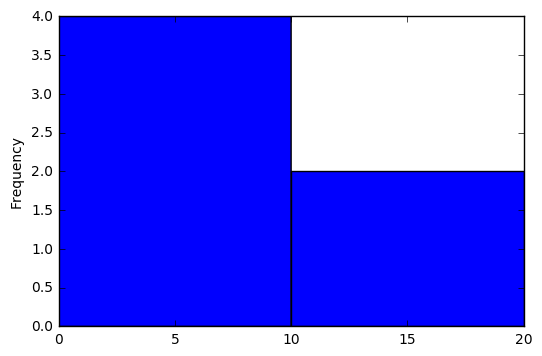

In [16]:
pd.Series([1,2,5,9,12,20]).plot(kind='hist', bins=[0,10,20]); # 'bins' defines the start and end points of bins

In [17]:
bin_values = np.arange(start=-50, stop=200, step=10)
print bin_values

[-50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80  90 100 110 120
 130 140 150 160 170 180 190]


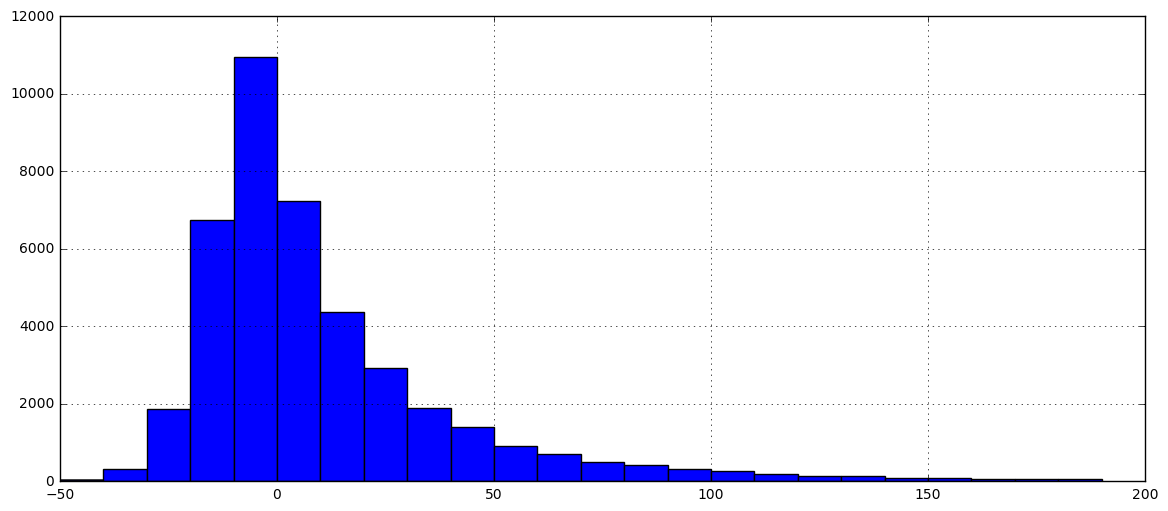

In [18]:
wn_carrier = data[data['unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6]);

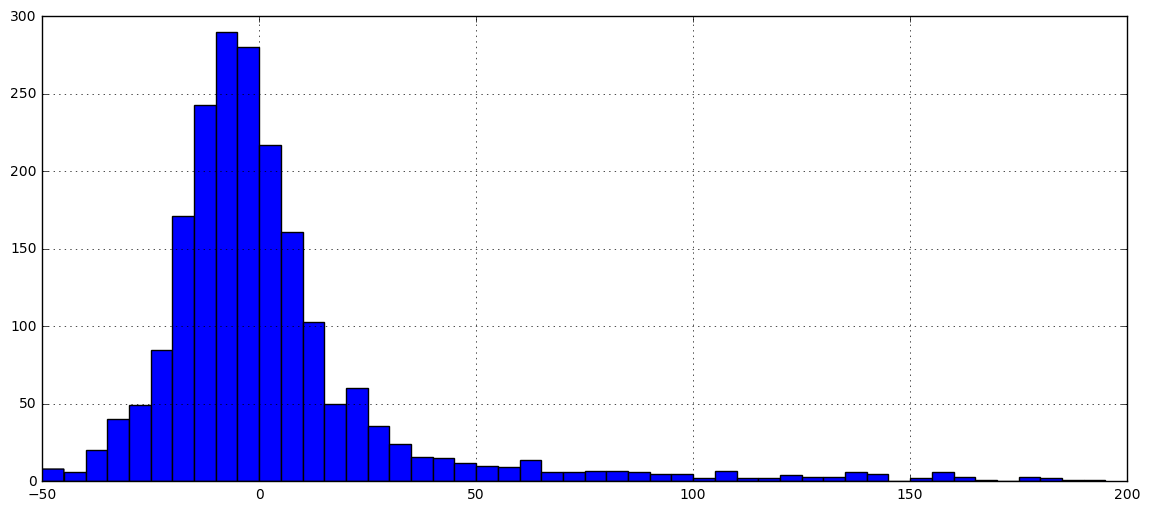

In [19]:
bin_values = np.arange(start=-50, stop=200, step=5)
vx_carrier = data[data['unique_carrier'] == 'VX']
vx_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6]);

In [20]:
vx_delayed = vx_carrier[(vx_carrier['arr_delay'] > 20) & (vx_carrier['arr_delay'] < 25) ]
vx_delayed['origin'].value_counts()

SFO    13
LAX    12
DAL     4
EWR     4
JFK     4
IAD     3
ORD     2
FLL     2
LAS     1
LGA     1
DCA     1
BOS     1
Name: origin, dtype: int64

In [21]:
filter_criterion = (vx_carrier['arr_delay'] > 15) & (vx_carrier['arr_delay'] < 20)
virgin_late_30 = vx_carrier[filter_criterion]
print virgin_late_30['origin'].shape
print virgin_late_30['origin'].value_counts()

(43L,)
LAX    15
SFO    12
JFK     4
BOS     3
DAL     3
LGA     2
DCA     1
EWR     1
ORD     1
SAN     1
Name: origin, dtype: int64


unique_carrier
MQ    Axes(0.125,0.125;0.775x0.775)
US    Axes(0.125,0.125;0.775x0.775)
Name: arr_delay, dtype: object

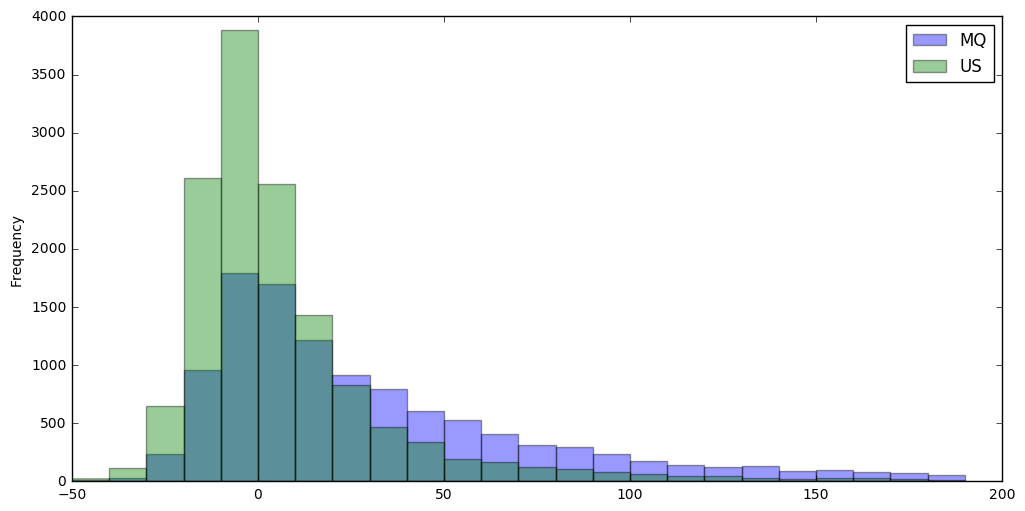

In [22]:
bin_values = np.arange(start=-50, stop=200, step=10)
us_mq_airlines_index = data['unique_carrier'].isin(['US','MQ']) 
us_mq_airlines = data[us_mq_airlines_index]
group_carriers = us_mq_airlines.groupby('unique_carrier')['arr_delay']
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True)

In [23]:
group_carriers.describe()

unique_carrier       
MQ              count   11275.000000
                mean       35.627406
                std        58.444090
                min       -51.000000
                25%        -2.000000
                50%        17.000000
                75%        53.000000
                max       788.000000
US              count   13972.000000
                mean        7.671557
                std        34.672795
                min       -59.000000
                25%       -10.000000
                50%        -1.000000
                75%        13.000000
                max       621.000000
Name: arr_delay, dtype: float64

In [24]:
print 'Envoy Air', group_carriers.describe()['MQ']['std'], 'minutes from the mean', group_carriers.describe()['MQ']['mean']
print 'US Airways', group_carriers.describe()['US']['std'], 'minutes from the mean', group_carriers.describe()['US']['mean']

Envoy Air 58.4440903966 minutes from the mean 35.627405765
US Airways 34.6727946615 minutes from the mean 7.67155740052


In [25]:
hi_volume = data['origin'].value_counts()[:20]
hi_volume

ATL    12678
ORD    10046
DFW     9854
DEN     7441
LAX     7434
IAH     5762
PHX     5610
SFO     5551
LAS     4902
MCO     4318
LGA     4075
DTW     4048
CLT     3959
MSP     3789
EWR     3754
SLC     3740
BOS     3738
SEA     3639
JFK     3609
FLL     3052
Name: origin, dtype: int64

In [26]:
hi_volume_airports_names = hi_volume.index.tolist()
print hi_volume_airports_names

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'SFO', 'LAS', 'MCO', 'LGA', 'DTW', 'CLT', 'MSP', 'EWR', 'SLC', 'BOS', 'SEA', 'JFK', 'FLL']


In [27]:
hi_volume_airports = data[data['origin'].isin(hi_volume_airports_names)]
hi_volume_airports.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,2015-01-02 00:00:00,AA,1.000000,JFK,LAX,-19.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,381.000000,False
1,2015-01-03 00:00:00,AA,1.000000,JFK,LAX,-39.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,358.000000,False
2,2015-01-04 00:00:00,AA,1.000000,JFK,LAX,-12.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,385.000000,False
3,2015-01-05 00:00:00,AA,1.000000,JFK,LAX,-8.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,389.000000,False
4,2015-01-06 00:00:00,AA,1.000000,JFK,LAX,25.000000,0.000000,2475.000000,0.000000,0.000000,0.000000,25.000000,0.000000,424.000000,True


In [28]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
flight_date,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00,3.327536,3.590580,0.509317,20.526899,36.049598,-6.842809,8.316993,-0.543307,12.156187,3.688742,13.709512,16.500000,-2.947712,5.834734,1.193333,4.590062,16.547325,12.254717,8.371429,4.534161
2015-01-03 00:00:00,15.428112,30.471616,13.768340,51.186292,37.604138,22.738007,37.370229,15.666667,39.844037,31.882979,18.550685,26.117338,15.606426,17.511364,20.027586,37.995702,19.783843,13.771812,11.773364,13.465190
2015-01-04 00:00:00,21.423343,26.867857,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,20.464286,55.445578,19.564767,28.159016,32.450704,39.847025,19.461279,83.225619,20.180085,10.291262,19.251092,15.503125
2015-01-05 00:00:00,3.095000,11.208609,6.051672,29.899200,28.705263,24.696594,22.674051,13.711864,8.450505,19.554422,17.229381,15.788618,34.984177,14.929204,23.874564,63.916667,13.665217,5.418060,13.225806,2.003356
2015-01-06 00:00:00,6.361725,43.310580,13.294964,15.344029,11.534626,35.078616,43.104530,23.425926,3.622642,43.359073,13.330579,7.234004,61.165049,29.996785,9.435088,42.356183,12.156658,4.372180,8.582716,0.581481
2015-01-07 00:00:00,0.944276,10.651316,4.869565,33.301095,10.428762,13.403727,22.030508,11.254464,10.490476,15.536680,7.498652,5.442446,46.063973,8.977918,-1.666667,38.479361,7.348028,9.467925,5.289216,2.977941
2015-01-08 00:00:00,3.033099,6.807692,10.484568,14.569873,11.217450,20.593060,15.419463,2.558442,1.571121,2.749091,8.597911,6.171329,3.575221,9.152648,47.264605,96.695578,8.000000,8.738351,5.141487,12.619718
2015-01-09 00:00:00,1.833499,21.045603,5.742331,21.551237,8.591810,34.665653,22.632107,1.808696,7.611354,43.294964,4.487245,8.144112,42.325581,8.758410,6.834459,46.355837,2.160550,7.464029,9.425178,3.878893
2015-01-10 00:00:00,-5.473046,3.763547,-1.658915,2.822014,5.501582,2.584906,0.422680,-5.172269,0.937888,1.259259,2.564706,2.709746,-11.311475,0.273273,8.542857,16.635209,2.213483,-2.761506,0.621622,2.718894


In [29]:
hi_volume_airports_pivots.describe()

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.049522,11.609776,7.350537,22.283364,18.216483,16.044343,17.213870,6.938287,11.216083,14.613638,11.723369,11.302481,17.699715,11.925022,9.627240,39.274123,9.223535,6.526833,11.517644,5.083884
std,12.798122,15.004838,7.499172,16.171575,12.854437,15.286101,18.718574,10.452380,11.488504,22.619487,11.574100,10.193057,23.428830,12.647029,14.971524,28.195169,7.051518,4.795902,8.742399,5.910367
min,-5.473046,-9.384106,-1.681250,-0.638838,2.690160,-6.842809,-5.456446,-7.118721,-0.530120,-14.911877,-3.695418,-2.958559,-11.311475,-2.242991,-7.691030,2.735369,-1.161593,-2.761506,0.621622,-5.717949
25%,0.944276,3.590580,0.509317,14.569873,8.591810,2.584906,0.422680,-0.543307,1.571121,1.259259,4.487245,5.442446,-0.883234,1.885350,1.193333,22.578704,2.213483,4.372180,5.289216,2.003356
50%,3.033099,8.254777,5.789286,20.526899,11.534626,20.593060,15.419463,3.360360,8.450505,4.297101,12.710526,8.144112,15.606426,8.977918,6.834459,37.995702,8.000000,7.318519,9.425178,3.878893
75%,6.361725,21.045603,13.294964,29.899200,28.705263,24.696594,22.674051,13.711864,17.064904,31.882979,17.229381,16.500000,34.984177,17.511364,19.461279,46.355837,13.665217,9.467925,13.225806,7.051546
max,42.375375,43.310580,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,39.844037,55.445578,40.793103,28.159016,61.165049,39.847025,47.264605,96.695578,20.180085,13.771812,27.918719,15.503125


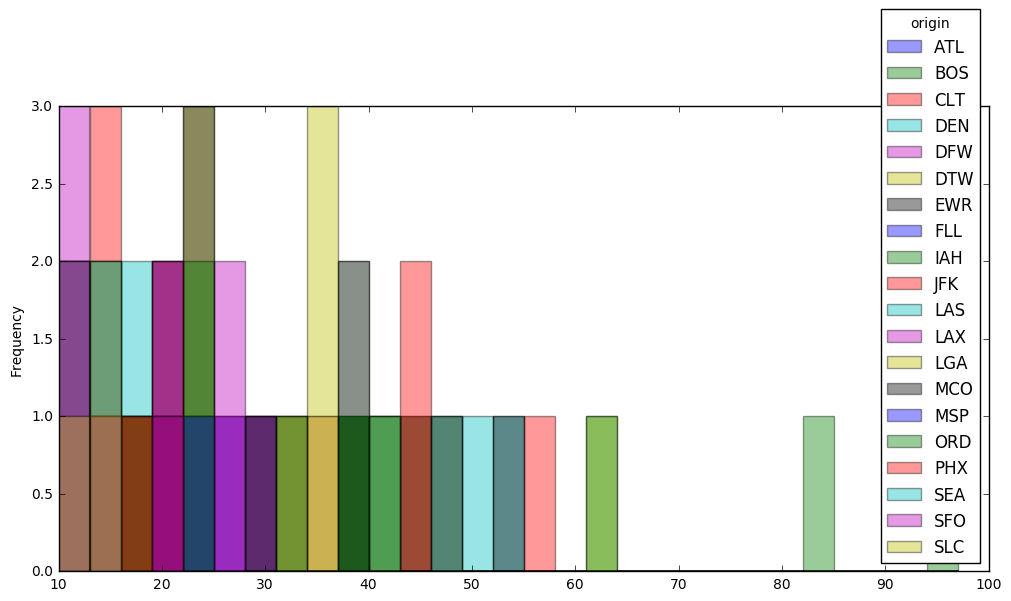

In [30]:
airport_bins = np.arange(10,100,3)
hi_volume_airports_pivots.plot(kind='hist', bins=airport_bins, figsize=[12,6], alpha=.4, legend=True);

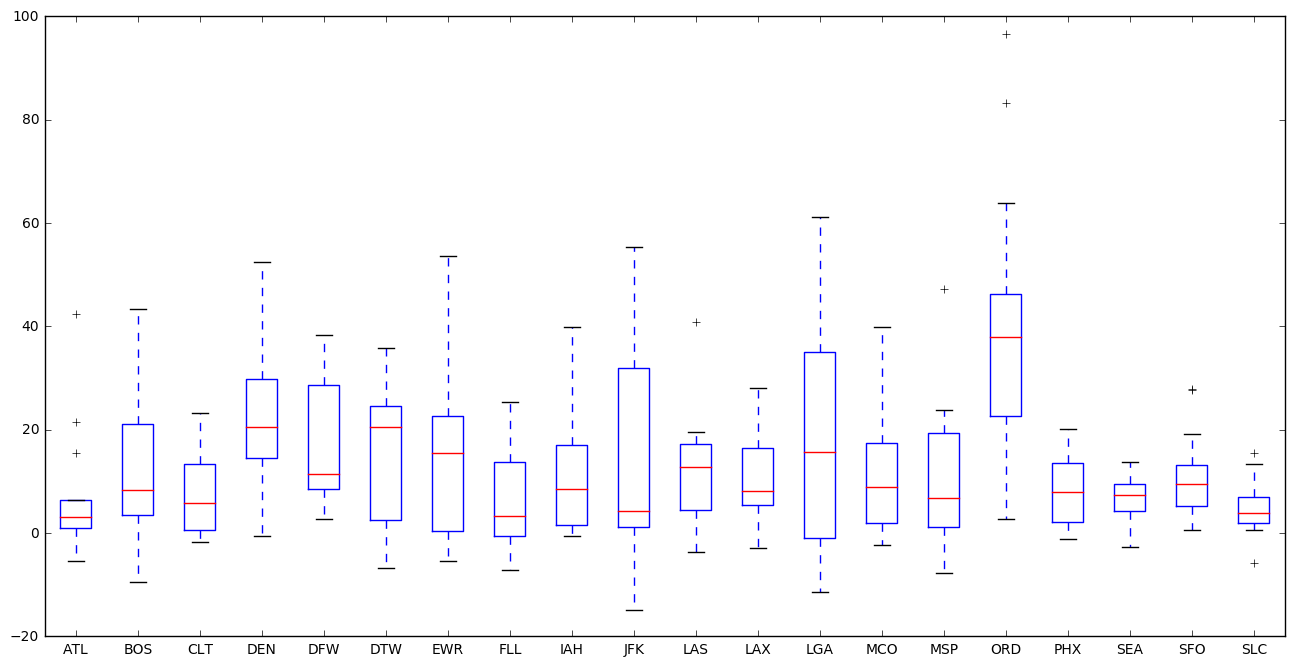

In [31]:
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8]);

In [32]:
hi_volume_airports.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,2015-01-02 00:00:00,AA,1.000000,JFK,LAX,-19.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,381.000000,False
1,2015-01-03 00:00:00,AA,1.000000,JFK,LAX,-39.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,358.000000,False
2,2015-01-04 00:00:00,AA,1.000000,JFK,LAX,-12.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,385.000000,False
3,2015-01-05 00:00:00,AA,1.000000,JFK,LAX,-8.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,389.000000,False
4,2015-01-06 00:00:00,AA,1.000000,JFK,LAX,25.000000,0.000000,2475.000000,0.000000,0.000000,0.000000,25.000000,0.000000,424.000000,True


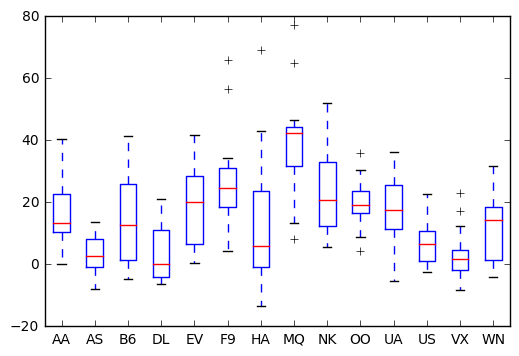

In [33]:
hi_volume_airports.pivot_table(index='flight_date', columns='unique_carrier', values='arr_delay').plot(kind='box');
